# Introduction to Convolution Neural Networks

## Import the libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing
Our MNIST images only have a depth of 1, but we must explicitly declare that

In [5]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Create, compile and train the model.
![CNN model](images/cnn-model.jpg)

- The first parameter is the number of filters

In [7]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total para

In [9]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 398s 7ms/step - loss: 0.1016 - acc: 0.9684 - val_loss: 0.0324 - val_acc: 0.9901
Epoch 2/5
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0243 - val_acc: 0.9920
Epoch 3/5
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0119 - val_acc: 0.9962
Epoch 4/5
60000/60000 [==============================] - 375s 6ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0158 - val_acc: 0.9948
Epoch 5/5
60000/60000 [==============================] - 365s 6ms/step - loss: 0.0139 - acc: 0.9957 - val_loss: 0.0070 - val_acc: 0.9976


## The accuracy of the model

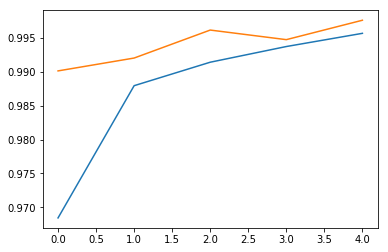

In [11]:
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])